In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.chdir('/home/brian/Documents/CPS/data/clean/')

In [2]:
cols = ['YEAR', 'MONTH', 'BASICWGT', 'INDGRP', 'LFS', 'INDM']
df = pd.concat([pd.read_feather(f'cps{year}.ft', columns=cols) for year in range(1989, 2026)])

In [3]:
data = df.groupby(['YEAR', 'MONTH', 'INDM']).BASICWGT.sum().unstack()

/tmp/ipykernel_312867/1629271289.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data = df.groupby(['YEAR', 'MONTH', 'INDM']).BASICWGT.sum().unstack()


In [4]:
dates = [pd.to_datetime(f'{year}-{month}-01') for year, month in data.index]

In [5]:
data.index = dates

In [6]:
data = data[data > 0].dropna()

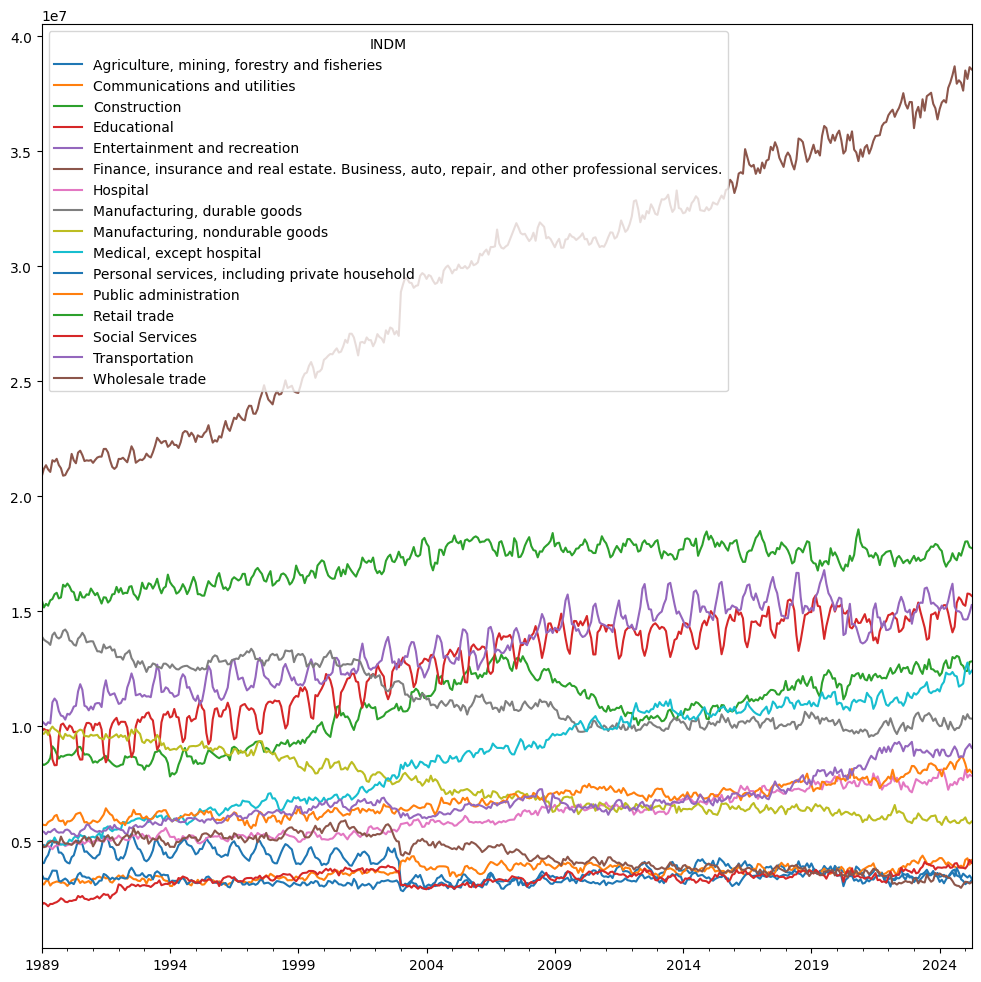

In [7]:
data.plot(figsize=(12, 12));

In [8]:
df.columns

Index(['YEAR', 'MONTH', 'BASICWGT', 'INDGRP', 'LFS', 'INDM'], dtype='object')

In [9]:
i25 = df.query('YEAR == 2025 and MONTH == 4 and LFS == "Employed"').groupby('INDM').BASICWGT.sum()

/tmp/ipykernel_312867/2678473436.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  i25 = df.query('YEAR == 2025 and MONTH == 4 and LFS == "Employed"').groupby('INDM').BASICWGT.sum()


In [10]:
i24 = df.query('YEAR == 2024 and MONTH == 4 and LFS == "Employed"').groupby('INDM').BASICWGT.sum()

/tmp/ipykernel_312867/3877255179.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  i24 = df.query('YEAR == 2024 and MONTH == 4 and LFS == "Employed"').groupby('INDM').BASICWGT.sum()


In [11]:
i25 - i24

INDM
Agriculture, mining, forestry and fisheries                                                      -43236.75
Communications and utilities                                                                     199258.75
Construction                                                                                    -128959.00
Educational                                                                                      375309.00
Entertainment and recreation                                                                     183143.00
Finance, insurance and real estate. Business, auto, repair, and other professional services.    1330816.00
Hospital                                                                                         214745.00
Manufacturing, durable goods                                                                     184206.00
Manufacturing, nondurable goods                                                                 -268168.50
Medical, except hospital        